Problem 2)
Visualize the distribution of income (GDP / capita) across countries and continents, and how the distribution
of income changes over time.
Interpret the visualization and what you notice. Are they any notable trends and/or deviations from that
trend?
What caveats apply to your conclusions?

Ans) If we look at the visualizations below we see that the income increases as time passes for almost all countries and all continents. Almost all countries have smooth rise over a year with only a few which have sharp spikes. Also, we see that Asia has a spike in around 1970s which then decreased and started following the curve similar to other continents. Also average income per person in africa is very less as compared to other continents.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import cm, pyplot as plt
import seaborn as sns


In [2]:
#read tables
data_point_path = "ddf--gapminder--systema_globalis/ddf--datapoints--"
entity_path = "ddf--gapminder--systema_globalis/ddf--entities--"
gdp_table = pd.read_csv(data_point_path + "income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv")
country_table = pd.read_csv(entity_path + "geo--country.csv")

In [3]:
gdp_table = gdp_table.rename(columns={"geo": "country"})
gdp_table.head()

,country,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [4]:
country_table.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,...,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,...,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,...,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [5]:
raw = pd.merge(gdp_table, country_table, left_on=['country'], right_on=['country'], how='left')
raw = raw.rename(columns={"income_per_person_gdppercapita_ppp_inflation_adjusted": "Income", 
                          "time": "Year", 
                          "name": "Name",
                          "world_4region": "Continent"})

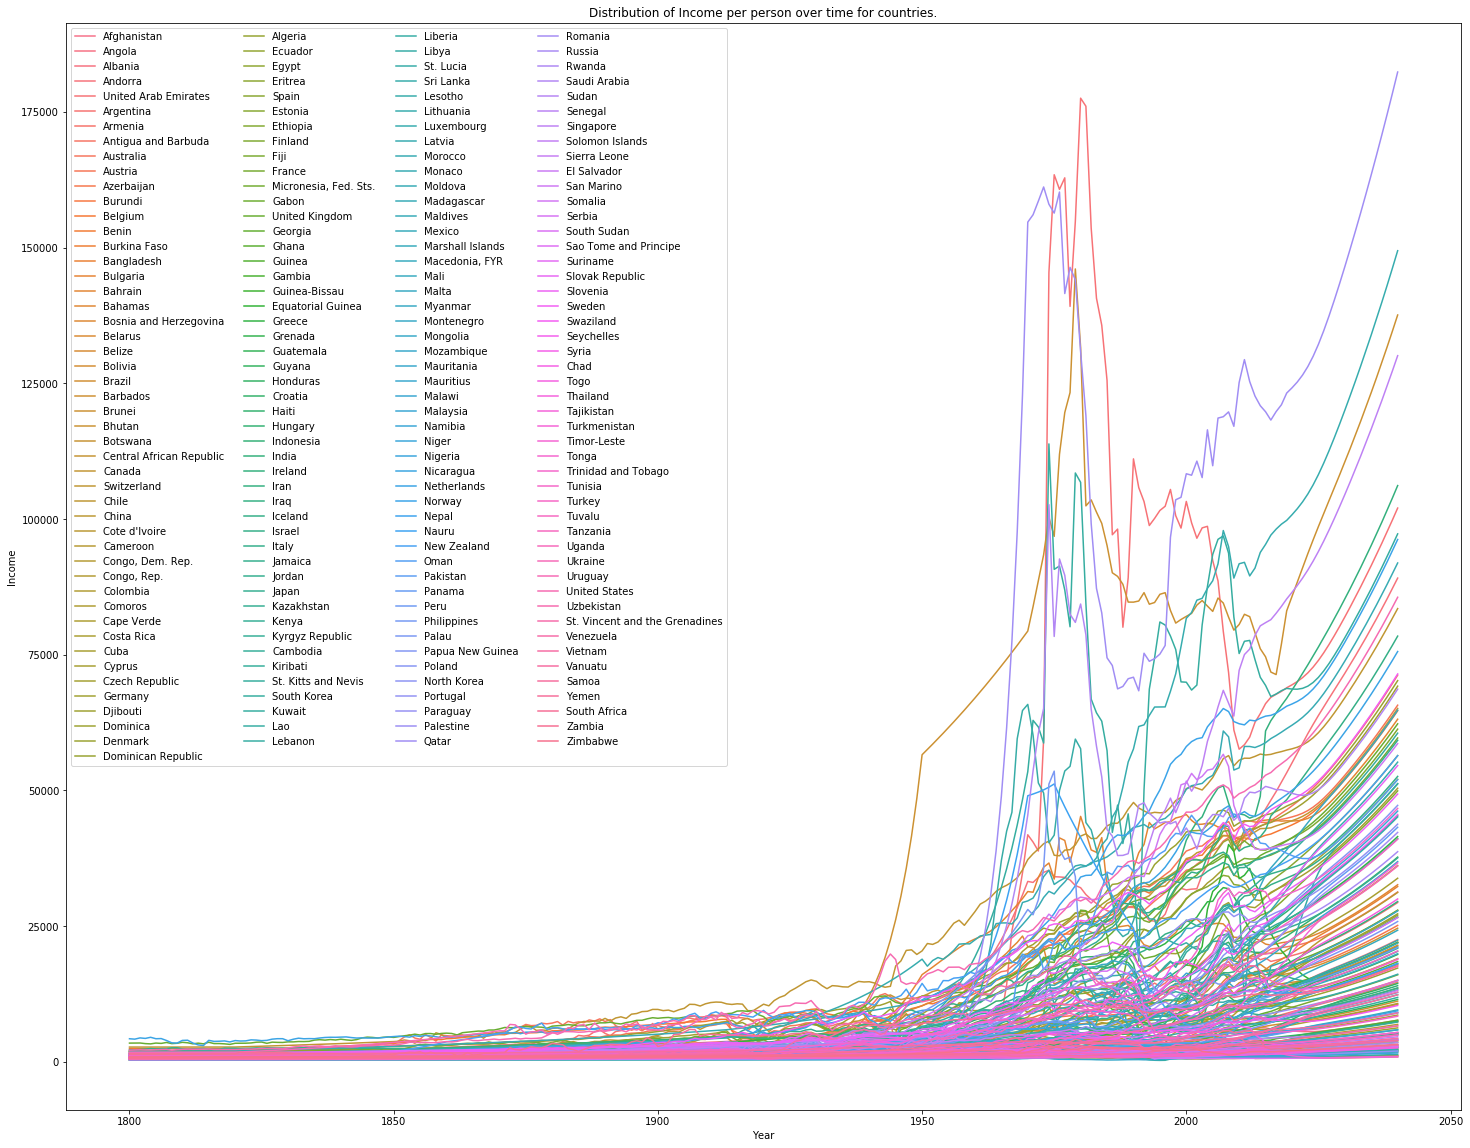

In [6]:
plt.rcParams["figure.figsize"] = (25,20)
ax = sns.lineplot(x="Year", y="Income", hue="Name", data=raw)
ax.title.set_text('Distribution of Income per person over time for countries.')
plt.legend(raw.Name.unique(), ncol=4, numpoints=1)
plt.show()

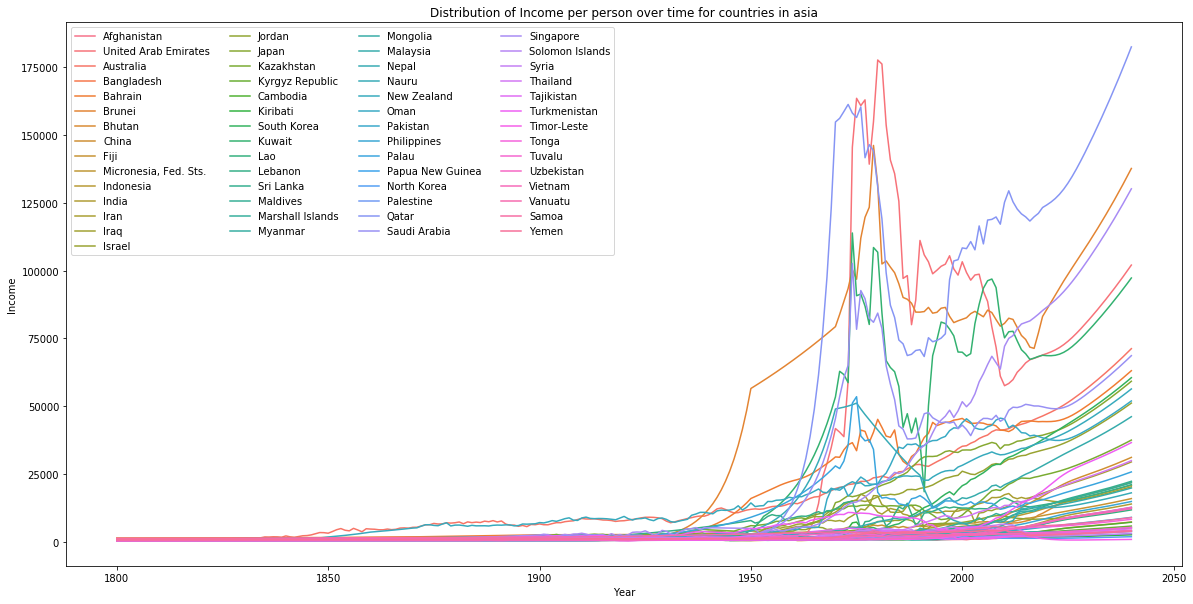

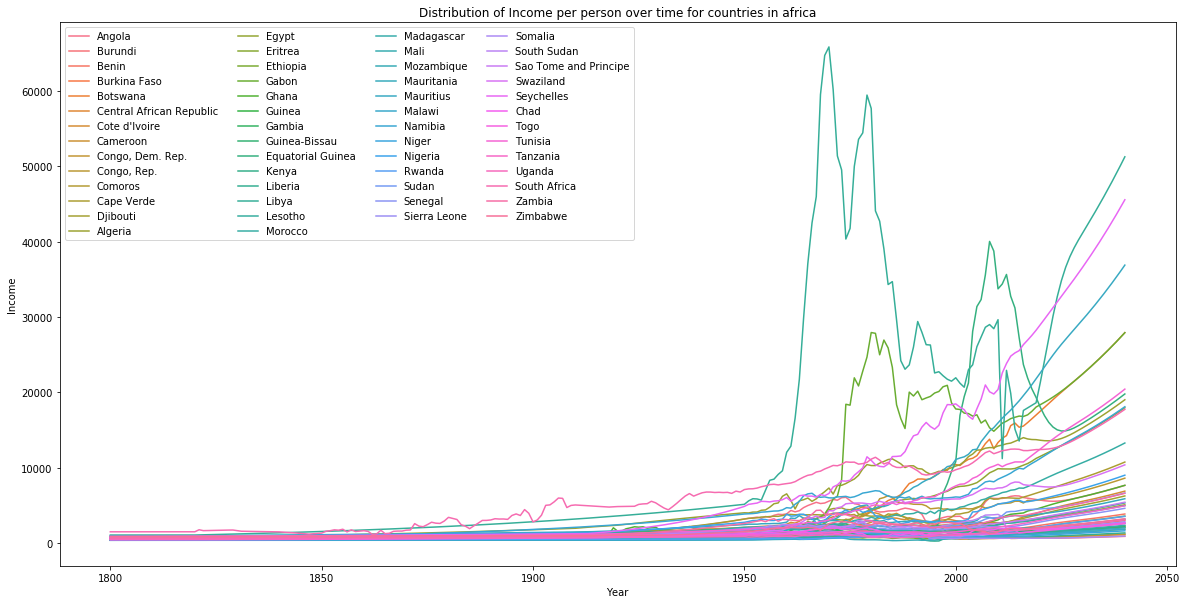

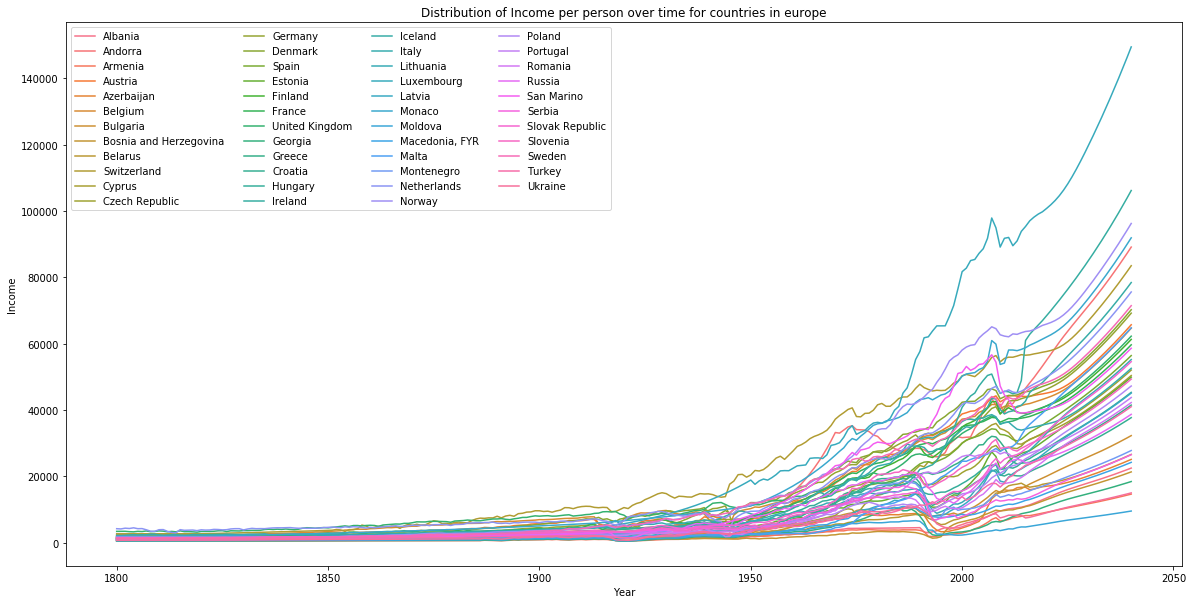

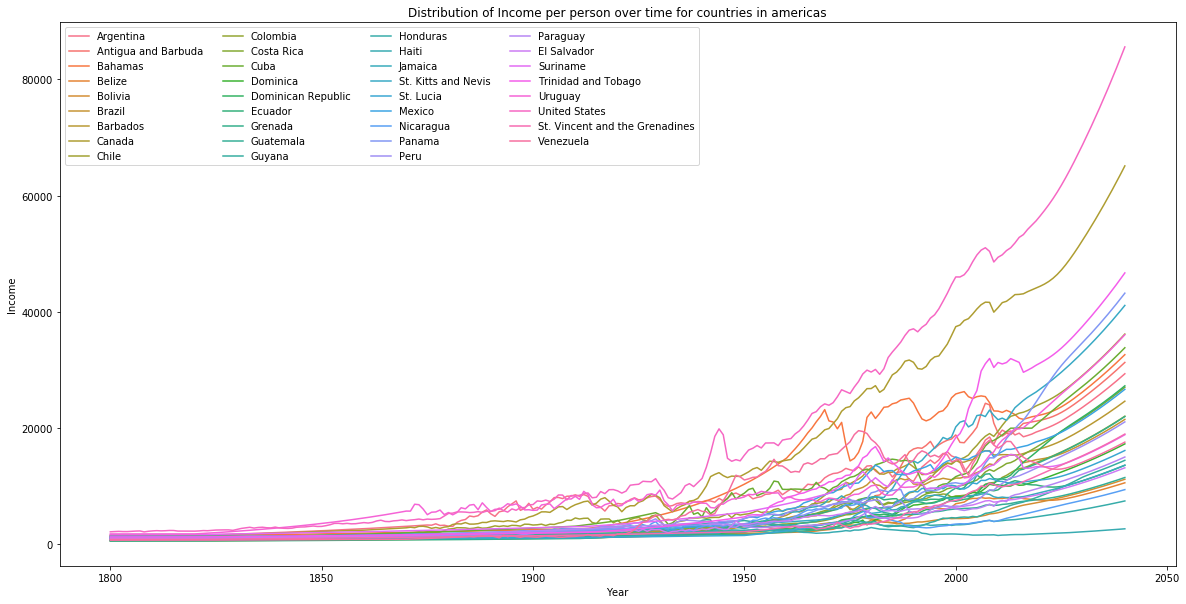

In [7]:
for continent in raw["Continent"].unique():
    plt.rcParams["figure.figsize"] = (20,10)
    cnd = raw[raw["Continent"] == continent]
    ax = sns.lineplot(x="Year", y="Income", hue="Name", data=cnd)
    ax.title.set_text('Distribution of Income per person over time for countries in ' + str(continent))
    plt.legend(cnd.Name.unique(), ncol=4, numpoints=1)
    plt.show()

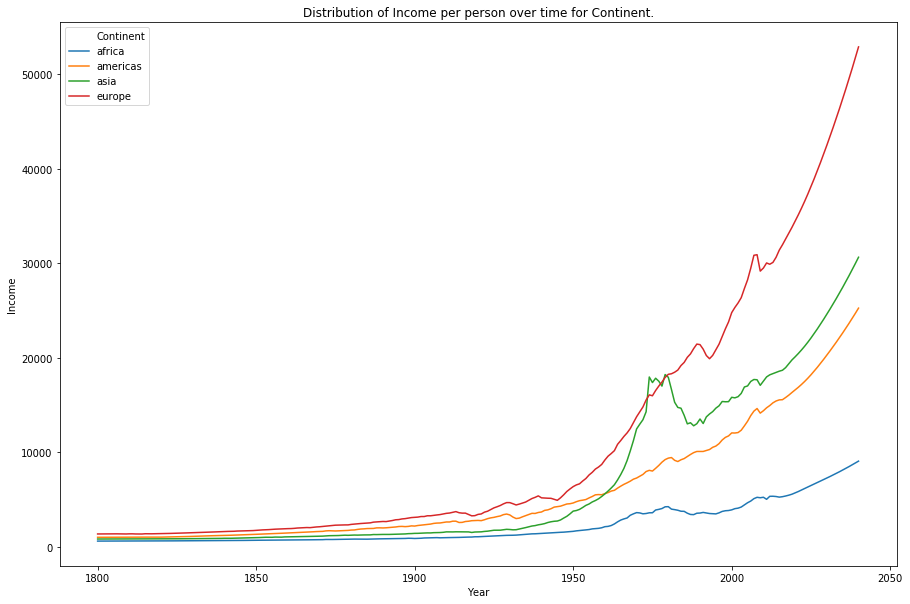

In [8]:
continent_gdp = raw[["Year", "Continent", "Income"]].groupby(["Year", "Continent"]).mean().reset_index()
continent_gdp.head()
plt.rcParams["figure.figsize"] = (15,10)
ax = sns.lineplot(x="Year", y="Income", hue="Continent", data=continent_gdp)
ax.title.set_text('Distribution of Income per person over time for Continent.')
plt.show()

